# 효율적인 모델 학습을 위한 이미지 해상도 줄이기

여기서는, 이미지 해상도를 줄이는 과정을 보여줍니다.

높이와 너비 모두 300 픽셀이상이면서 가장 작은 사이즈가 되도록 줄입니다.

4개의 다른 채널에 대해 줄이기 전과 후 이미지를 출력하여 보여줍니다.

In [56]:
rawdatapath = "raw_images/201103030645_image/"
outputpath = "reduced_images/201103030645_image/"

In [57]:
def rgb2gray(rgb):
    ratio = [0.2989, 0.5870, 0.1140]
    ret = np.expand_dims(np.dot(rgb[...,:3], ratio), axis=2)
    return ret

coms_mi_le1b_ir02_ea040ps_201103030645.png


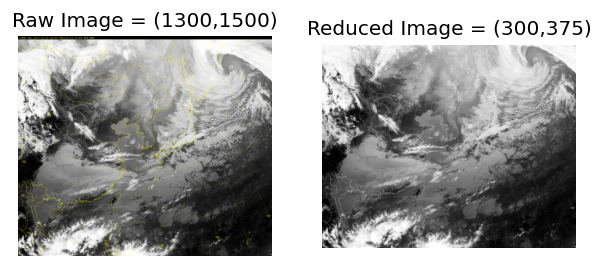

coms_mi_le1b_ir01_ea040ps_201103030645.png


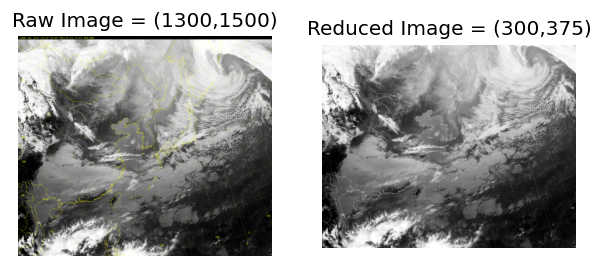

coms_mi_le1b_wv_ea040ps_201103030645.png


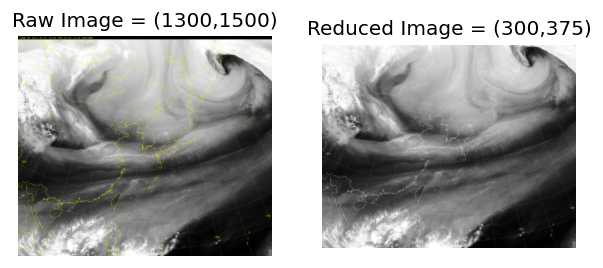

coms_mi_le1b_swir_ea040ps_201103030645.png


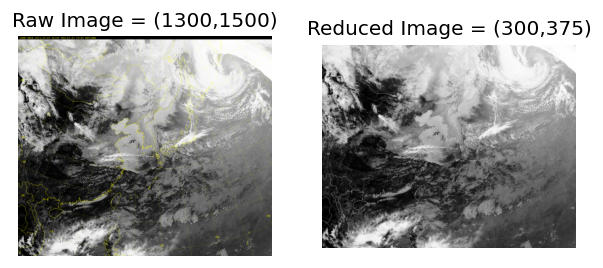

In [60]:
if os.path.isdir(outputpath) is False:
    os.makedirs(outputpath)

show_flag = False
if os.path.isdir(rawdatapath):
    rawfile_list = os.listdir(rawdatapath)
    for f in rawfile_list:
        if f.endswith(".png") is False:
            continue
        print(f)
        rawfile_path = rawdatapath + f
        rawimage = plt.imread(rawfile_path)
        rawimage_size = rawimage.shape
        
        processedimage = rgb2gray(rawimage[100:])
        processedimage = np.squeeze(processedimage)

        # Reduce Resolution by mean-pooling
        s = min(rawimage_size[0], rawimage_size[1])
        reduce_size = 1
        i = 1
        while True:
            if (s // i) < 300:
                reduce_size = i-1
                break
            i += 1
        reducedimage = block_reduce(processedimage, block_size=(reduce_size, reduce_size), func=np.mean)
        reducedimage_size = reducedimage.shape

        save_image = reducedimage * 255
        save_image = save_image.astype(np.uint8)

        imsave(outputpath + f, save_image)

        fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120)
        axes[0].imshow(rawimage, cmap='gray')
        axes[0].set_title("Raw Image = (%d,%d)" % (rawimage_size[0], rawimage_size[1]))
        axes[1].imshow(reducedimage, cmap='gray')
        axes[1].set_title("Reduced Image = (%d,%d)" % (reducedimage_size[0], reducedimage_size[1]))
        axes[0].axis('off')
        axes[1].axis('off')
        plt.show()

# 비디오 데이터 생성 과정 예시

6시간 길이의 비디오를 구성할 때, 20개의 이미지로만 구성되도록 통일시킵니다.

따라서 6시간 내에 20개 초과 이미지로 구성되는 비디오의 경우, 이 중 무작위하게 20개를 골라 하나의 비디오로 구성합니다.

예시를 통해, 24개의 이미지로 구성된 비디오가 무작위 선택 후 20개의 이미지로 구성된 비디오로 통일됨을 보입니다.

In [71]:
rawdatapath = "raw_images/"
video_length = 6
sample_size = 20

np.random.seed(2021)

In [72]:
videos = []

if os.path.isdir(rawdatapath):
    rawimage_list = [d for d in os.listdir(rawdatapath) if os.path.isdir(rawdatapath + d) is True and "image" in d]
    for i, d_i in enumerate(rawimage_list):
        datetime_i = d_i.split("_")[0]
        year, month, day, hour, minute = int(datetime_i[0:4]), int(datetime_i[4:6]), int(datetime_i[6:8]), int(datetime_i[8:10]), int(datetime_i[10:12])
        t_i = datetime(year, month, day, hour, minute)
        video = [datetime_i]
        for j in range(i+1, len(rawimage_list)):
            d_j = rawimage_list[j]
            datetime_j = d_j.split("_")[0]
            year, month, day, hour, minute = int(datetime_j[0:4]), int(datetime_j[4:6]), int(datetime_j[6:8]), int(datetime_j[8:10]), int(datetime_j[10:12])
            t_j = datetime(year, month, day, hour, minute)
            length = (t_j - t_i).total_seconds() / 60 / 60
            if length >= video_length:
                break
            video.append(datetime_j)
        if len(video) >= 21:
            videos.append(video)

Randomly select 20 among 24


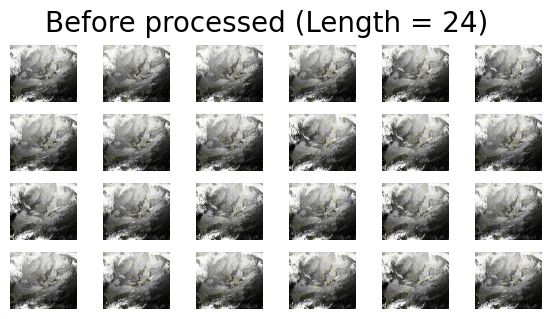

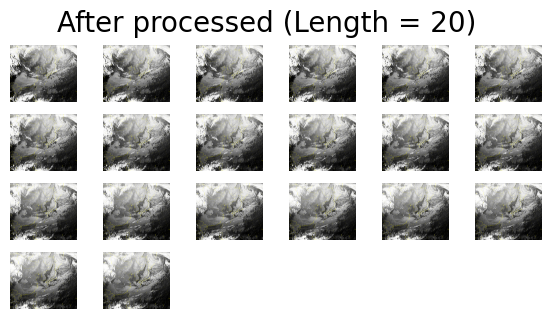

In [76]:
for video in videos:
    f, axarr = plt.subplots(4,6, figsize=(7,3.5), dpi=100)
    for i, v in enumerate(video):
        r = i // 6
        c = i % 6
        for p in os.listdir(rawdatapath + v + "_image/"):
            if "ir01" in p: 
                img = plt.imread(rawdatapath + v + "_image/" + p)
                axarr[r,c].imshow(img)
                axarr[r,c].axis("off")
                #tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)
    f.suptitle("Before processed (Length = %d)" % (len(video)), fontsize=20)
    f.show()
    
    print("Randomly select " + str(sample_size) + " among " + str(len(video)))
    num_images = len(video)
    sample_images = [video[0]] + np.random.choice(list(set(video) - {video[0]}), sample_size-1, replace=False).tolist()
    sampled_video = sorted(sample_images)
    
    f, axarr = plt.subplots(4,6, figsize=(7,3.5), dpi=100)
    for i, v in enumerate(sampled_video):
        r = i // 6
        c = i % 6
        for p in os.listdir(rawdatapath + v + "_image/"):
            if "ir01" in p: 
                img = plt.imread(rawdatapath + v + "_image/" + p)
                axarr[r,c].imshow(img)
                # axarr[r,c].axis("off")
                #tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)
    for i in range(24):
        r = i // 6
        c = i % 6
        axarr[r,c].axis("off")
    f.suptitle("After processed (Length = %d)" % (len(sampled_video)), fontsize=20)
    f.show()
    
    break